# Prompt Engineering Basics

Chat GPT explains:

> Prompt engineering is the process of designing and refining the questions or instructions given to an AI, like me, so that it produces accurate and useful responses. It involves experimenting with different wordings and structures to communicate clearly what you need, making sure that the AI understands and follows the intended task. In high school terms, it's like learning how to ask questions in a way that gets the best possible answers from a computer.

Meta's llama-3-3-70b-instruct explains:

> Prompt engineering is the process of designing and optimizing the input prompts or questions that are given to artificial intelligence (AI) systems, such as language models or chatbots, to elicit specific and accurate responses. By carefully crafting the language and structure of the prompts, developers can improve the performance and reliability of AI systems, and even influence the tone and style of the responses they generate. Effective prompt engineering requires a deep understanding of both the capabilities and limitations of AI systems, as well as the nuances of human language and communication, making it a challenging but rewarding field that combines elements of computer science, linguistics, and cognitive psychology.

See:

- [Prompt Engineering Guide](https://www.promptingguide.ai/)
- [How I Won Singapore’s GPT-4 Prompt Engineering Competition](https://towardsdatascience.com/how-i-won-singapores-gpt-4-prompt-engineering-competition-34c195a93d41/)
- IBM reference on [Prompt Engineering](https://www.ibm.com/think/topics/prompt-engineering)

Also to improve your prompt templates [Anthropic prompt improvement](https://console.anthropic.com/dashboard):

- [Use our prompt improver to optimize your prompts](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/prompt-improver)


In [1]:
!pip install ibm-watsonx-ai transformers accelerate

In [2]:
from IPython.display import display, Markdown, Latex

In [3]:
from ibm_watsonx_ai import APIClient
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import ModelInference

credentials = Credentials(
    url = "https://us-south.ml.cloud.ibm.com",
    api_key = "Z1xW3XoluoH9sui5DAp581YoJIzzgJzwj238x2J3YnTu",
)

client = APIClient(credentials)

In [4]:

model = ModelInference(
  model_id="ibm/granite-13b-instruct-v2",
  api_client=client,
  project_id="52d580ac-dd10-419a-b925-bbddfbbae1af",
  params = {
      "max_new_tokens": 1000
  }
)

'''
model = ModelInference(
  model_id="meta-llama/llama-3-3-70b-instruct",
  api_client=client,
  project_id="52d580ac-dd10-419a-b925-bbddfbbae1af",
  params = {
      "max_new_tokens": 1000
  }
)
'''

'\nmodel = ModelInference(\n  model_id="meta-llama/llama-3-3-70b-instruct",\n  api_client=client,\n  project_id="52d580ac-dd10-419a-b925-bbddfbbae1af",\n  params = {\n      "max_new_tokens": 1000\n  }\n)\n'

## Hello world

This is the IBM equilivant of Hello World

In [5]:
prompt = 'How far is Paris from Bangalore?'
print(model.generate(prompt))
print("\n")
print(model.generate_text(prompt))

{'model_id': 'ibm/granite-13b-instruct-v2', 'created_at': '2025-04-16T16:18:31.256Z', 'results': [{'generated_text': 'Indian cities are well connected by flights to Paris. The flight duration is about 8 hours. ', 'generated_token_count': 20, 'input_token_count': 8, 'stop_reason': 'eos_token'}]}


Indian cities are well connected by flights to Paris. The flight duration is about 8 hours. 


## Lets get started

In [6]:
prompt = 'Describe prompt engineering in a three sentences for my class to high school students?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

Prompt engineering is a way to solve problems by asking the right questions. It's a way of thinking that helps you find the right solution to a problem. Prompt engineering is a way of thinking that helps you find the right solution to a problem. It's a way of asking questions that helps you find the right solution to a problem. Prompt engineering is a way of thinking that helps you find the right solution to a problem. It's a way of asking questions that helps you find the right solution to a problem. 

In [7]:
prompt = 'Explain prompt engineering in two bullet points. Please use markdown'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

 to format your responseTwo bullet points.

In [8]:
prompt = 'How did the stock market do today?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

The Dow Jones Industrial Average was up 5 points at the close of trading.

In [9]:
prompt = 'What day is it?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

It is a holiday.

In [10]:
prompt = 'What is the date you were trained?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

I was trained on March 1, 2020. 

In [11]:
prompt = 'Who won Super Bowl LIX?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

The New England Patriots

In [12]:
prompt = 'When was that event?'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

That event was on June 26, 1944.

The Patriots won Super Bowl LIII on Feb 3, 2019.
The Philadelphia Eagles won Super Bowl LIX on Feb 9, 2025

## Zero shot prompting

Large language models (LLMs) today, such as GPT-3.5 Turbo, GPT-4, and Claude 3, are tuned to follow instructions and are trained on large amounts of data. Large-scale training makes these models capable of performing some tasks in a "zero-shot" manner. 

_Zero-shot prompting_ means that the prompt used to interact with the model won't contain examples or demonstrations. The zero-shot prompt directly instructs the model to perform a task without any additional examples to steer it.

In [13]:
prompt = 'Provide an example of zero shot prompting'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

Yes, I would like to know the price of a ticket to Disneyland.

### Zero shot observation

When zero-shot doesn't work, it's recommended to provide demonstrations or examples in the prompt which leads to few-shot prompting. 

## Few Shot Prompting

Few-shot prompting can be used as a technique to enable in-context learning where we provide demonstrations in the prompt to steer the model to better performance. The demonstrations serve as conditioning for subsequent examples where we would like the model to generate a response.

In [14]:
prompt = 'Provide an example of few shot prompting'
# print(model.generate(prompt))
# print("\n")
response = model.generate_text(prompt)

# Displaying Markdown
display(Markdown(response))

Yes, I can provide an example of few shot prompting. For example, you can say "What is the color of the dog?" or "What is the color of the car?"

Let's demonstrate few-shot prompting via an example that was presented in [Brown et al. 2020](https://arxiv.org/abs/2005.14165). In the example, the task is to correctly use a new word in a sentence.

In [15]:
prompt = '''A "whatpu" is a small, furry animal native to Tanzania. An example of a sentence that uses the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.
 
To do a "farduddle" means to jump up and down really fast. An example of a sentence that uses the word farduddle is:
'''
print(model.generate(prompt))
print("\n")
print(model.generate_text(prompt))

{'model_id': 'ibm/granite-13b-instruct-v2', 'created_at': '2025-04-16T16:18:37.291Z', 'results': [{'generated_text': 'The kids were doing a farduddle in the living room.', 'generated_token_count': 14, 'input_token_count': 79, 'stop_reason': 'eos_token'}]}


The kids were doing a farduddle in the living room.


## Chain of Thought prompting

Introduced in [Wei et al. (2022)](https://arxiv.org/abs/2201.11903), chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps. You can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

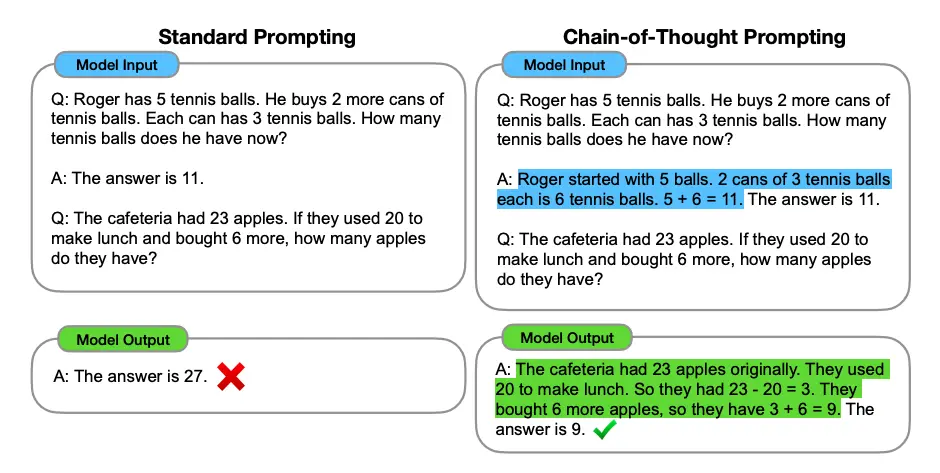

Absolutely! “Chain of Thought” (CoT) prompting is a **prompt engineering technique** that encourages a language model to reason step-by-step instead of jumping directly to the final answer. This often improves the model’s accuracy on complex problems like math, logic, or multi-step reasoning.

---

#### 🧠 What is Chain of Thought Prompting?

**Definition:**  
Chain of Thought prompting provides intermediate reasoning steps in the prompt so that the model learns to explain its thinking before arriving at an answer.

**Why it helps:**  
LLMs are better at reasoning when they’re guided through the steps—just like how we ask students to "show their work" in math class.

---

#### ✅ Example – Chain of Thought Prompt

**Task:** Solve a math word problem.

---

##### 🔹 Without Chain of Thought Prompting (Naive Prompt)
```
Q: If there are 3 cars and each car has 4 wheels, how many wheels are there in total?
A:
```

**LLM Answer:**  
`12` (Sometimes right, but often misses context in harder problems.)

---

##### 🔹 With Chain of Thought Prompting
```
Q: If there are 3 cars and each car has 4 wheels, how many wheels are there in total?
A: First, we know that one car has 4 wheels.
If there are 3 cars, then the total number of wheels is 3 times 4.
3 times 4 is 12.
So, the answer is 12.
```

**LLM Output:**  
`12` ✅ But now it explains *how* it got there, and this process improves reliability.

---

#### 🧪 Another Example – Logic Puzzle

##### Prompt:
```
Q: Mary has 5 more apples than Tom. Tom has 3 apples. How many apples does Mary have?
A: Let's think step by step.
Tom has 3 apples.
Mary has 5 more than Tom.
So, Mary has 3 + 5 = 8 apples.
The answer is 8.
```

---

#### 📚 Teaching Tip

Tell your students:  
“Just like showing your work helps a teacher understand your thinking, Chain of Thought helps AI models think more clearly and avoid silly mistakes.”

---

#### 🔍 When to Use It

| Use Case | Benefit |
|----------|---------|
| Math Problems | Breaks down complex calculations |
| Logical Reasoning | Prevents shortcuts and wrong assumptions |
| Code Generation | Explains each function/purpose |
| Reading Comprehension | Tracks the reasoning from question to answer |

---

#### 📖 Reference

- [Wei et al., 2022 – Chain of Thought Prompting](https://arxiv.org/abs/2201.11903)
- [Prompting Guide - Chain of Thought](https://www.promptingguide.ai/techniques/chain-of-thought)

Would you like a slide deck or printable handout version of this explanation?

In [16]:
prompt = """
Q: If there are 3 cars and each car has 6 wheels, how many wheels are there in total?
A:
"""
# print(model.generate(prompt))
# print("\n")
display(Markdown(model.generate_text(prompt)))

18

In [17]:
prompt = """
Q: If there are 3 cars and each car has 4 wheels, how many wheels are there in total?
A: First, we know that one car has 4 wheels.
If there are 3 cars, then the total number of wheels is 3 times 4.
3 times 4 is 12.
So, the answer is 12.
"""
# print(model.generate(prompt))
# print("\n")
display(Markdown(model.generate_text(prompt)))

12

### Another example

In [18]:
from ibm_watsonx_ai.foundation_models import Model

# Step 3: Chain of Thought Prompt
cot_prompt = """
Let's solve this math problem step by step.

Question: If a train travels at 60 miles per hour for 3.5 hours, how far does it go?

Answer: Let's think step by step.
"""

# Step 4: Generate response using CoT
response = model.generate(prompt=cot_prompt)
cot_answer = response['results'][0]['generated_text'].strip()

print("Chain of Thought Reasoning:\n")
print(cot_answer)

Chain of Thought Reasoning:

60 * 3.5 = 210 miles. The answer: 210.


## Zero-shot COT Prompting

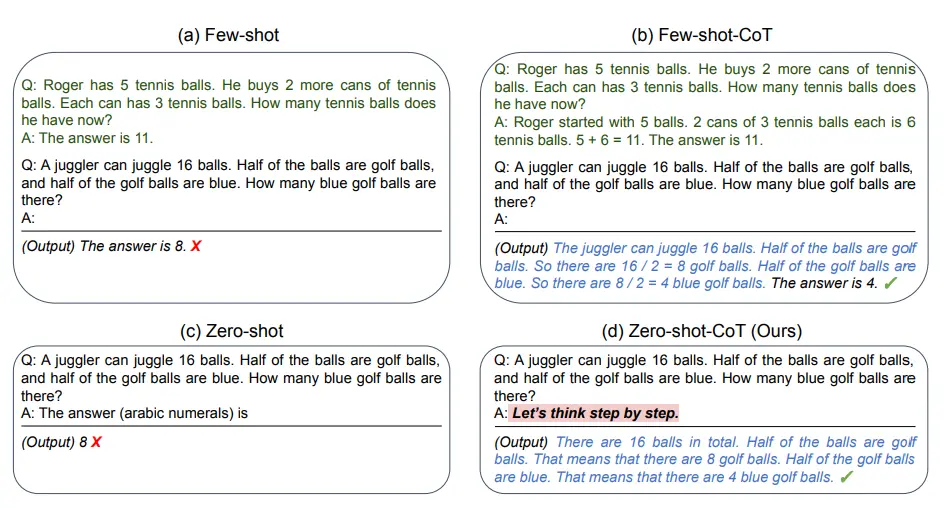

In [19]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. 
I then went and bought 5 more apples and ate 1. 
How many apples did I remain with?
"""
# print(model.generate(prompt))
# print("\n")
display(Markdown(model.generate_text(prompt)))

10 - 2 - 2 - 1 = 5 apples.

In [20]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?
Let's think step by step.
"""
# print(model.generate(prompt))
# print("\n")
display(Markdown(model.generate_text(prompt)))

I bought 10 + 5 = 15 apples. I gave 2 + 2 = 4 apples. I remained with 15 - 4 = 11 apples.
The answer: 11.

It missed that I ate one.

## Prompt chaining

Absolutely! “Prompt Chaining” is a **prompt engineering technique** where you **break a complex task into smaller steps** using multiple prompts—**chaining** them together so that the output of one prompt becomes the input to the next.

---

#### 🔗 What is Prompt Chaining?

**Definition:**  
Prompt Chaining is the practice of linking multiple prompts together to **tackle a larger or more complex problem**. It mimics how humans break down projects into smaller tasks.

**Why it helps:**  
Language models often perform better when given focused, simpler tasks. Prompt chaining lets you guide the model’s thinking **one step at a time**.

---

#### ✅ Example – Summarize → Analyze → Rewrite

Let’s say we have a long article and we want to **create a LinkedIn post** from it. This can be broken into three chained prompts:

---

#### 🔹 Step 1: Summarize
**Prompt 1:**
```
Summarize the following article in 3-4 sentences:
[Insert article here]
```

**Output →** A short summary of the article.

---

🔹 Step 2: Analyze the Summary
**Prompt 2:**
```
Based on this summary, what are the key insights that would be relevant for a business audience on LinkedIn?
[Insert summary from step 1]
```

**Output →** List of key points or takeaways.

---

🔹 Step 3: Rewrite for LinkedIn
**Prompt 3:**
```
Using the key insights below, write a LinkedIn post in a friendly, professional tone.
[Insert key insights from step 2]
```

**Output →** A polished LinkedIn post.

---

#### 🧠 Why Teach Prompt Chaining?

Tell your students:

> "Prompt chaining is like building a multi-step recipe: one step feeds into the next. It lets us guide the model more precisely, especially for complex tasks like summarizing, translating, coding, or generating business reports."

---

#### 🛠 Use Cases

| Use Case | Chain Steps |
|----------|-------------|
| Article to Social Post | Summarize → Extract insights → Rewrite |
| Data Cleaning | Identify issues → Suggest fixes → Apply transformation |
| Code Generation | Describe task → Generate code → Explain code |
| Customer Support | Analyze question → Retrieve policy → Generate response |

---

#### 🧪 Real-World Example (Text QA)

Let’s say we have a document and want to extract an answer and explain it:

Step 1:
```
Extract the answer to this question from the passage: [question + passage]
```

→ Output: A short answer

Step 2:
```
Explain how the passage supports this answer: [passage + short answer]
```

→ Output: A justification

---

#### 📖 Reference

- [Prompting Guide – Prompt Chaining](https://www.promptingguide.ai/techniques/prompt_chaining)
- [LangChain Docs – Chains](https://docs.langchain.com/docs/components/chains/)

---

Would you like a visual diagram or classroom activity to go along with this explanation?

In [21]:
article = """
Prompt engineering is a relatively new discipline for developing and optimizing prompts to efficiently use language models (LMs) for a wide variety of applications and research topics. Prompt engineering skills help to better understand the capabilities and limitations of large language models (LLMs).

Researchers use prompt engineering to improve the capacity of LLMs on a wide range of common and complex tasks such as question answering and arithmetic reasoning. Developers use prompt engineering to design robust and effective prompting techniques that interface with LLMs and other tools.

Prompt engineering is not just about designing and developing prompts. It encompasses a wide range of skills and techniques that are useful for interacting and developing with LLMs. It's an important skill to interface, build with, and understand capabilities of LLMs. You can use prompt engineering to improve safety of LLMs and build new capabilities like augmenting LLMs with domain knowledge and external tools.

Motivated by the high interest in developing with LLMs, we have created this new prompt engineering guide that contains all the latest papers, advanced prompting techniques, learning guides, model-specific prompting guides, lectures, references, new LLM capabilities, and tools related to prompt engineering.
"""

prompt = """
Summarize the following article in 3-4 sentences:
"""

print(prompt + "\n\n\n" + article)
# print(model.generate(prompt))
# print("\n")
display(Markdown(model.generate_text(prompt)))


Summarize the following article in 3-4 sentences:




Prompt engineering is a relatively new discipline for developing and optimizing prompts to efficiently use language models (LMs) for a wide variety of applications and research topics. Prompt engineering skills help to better understand the capabilities and limitations of large language models (LLMs).

Researchers use prompt engineering to improve the capacity of LLMs on a wide range of common and complex tasks such as question answering and arithmetic reasoning. Developers use prompt engineering to design robust and effective prompting techniques that interface with LLMs and other tools.

Prompt engineering is not just about designing and developing prompts. It encompasses a wide range of skills and techniques that are useful for interacting and developing with LLMs. It's an important skill to interface, build with, and understand capabilities of LLMs. You can use prompt engineering to improve safety of LLMs and build new capabili

The US is set to lift travel restrictions in November for fully vaccinated foreign visitors, the White House has announced.The lifting of the 18-month blanket ban will come just days before the busy Christmas period.

In [22]:
# Sample article text
article = """
Renewable energy sources such as solar and wind are transforming the power grid across the United States. 
Government incentives and falling technology costs are accelerating this transition. Experts believe that a 
majority of energy needs could be met by renewables within the next decade.
"""

# --- Prompt 1: Summarize the article ---
prompt1 = f"Summarize the following article in 2-3 sentences:\n\n{article}"
response1 = model.generate(prompt=prompt1)
summary = response1['results'][0]['generated_text'].strip()
print("🔹 Step 1: Summary\n", summary)

# --- Prompt 2: Extract key insights for LinkedIn audience ---
prompt2 = f"Based on this summary, list 2 key insights that would be relevant to a business audience on LinkedIn:\n\n{summary}"
response2 = model.generate(prompt=prompt2)
insights = response2['results'][0]['generated_text'].strip()
print("\n🔹 Step 2: Key Insights\n", insights)

# --- Prompt 3: Generate LinkedIn post ---
prompt3 = f"Write a professional LinkedIn post using the following insights:\n\n{insights}"
response3 = model.generate(prompt=prompt3)
linkedin_post = response3['results'][0]['generated_text'].strip()
print("\n🔹 Step 3: LinkedIn Post\n", linkedin_post)

🔹 Step 1: Summary
 However, the grid is not ready to handle the large-scale integration of renewables.

🔹 Step 2: Key Insights
 insights from the report include:

🔹 Step 3: LinkedIn Post
 The report found that the number of people who have a LinkedIn profile has grown by more than 50% since 2017.


## Tree of thought

For complex tasks that require exploration or strategic lookahead, traditional or simple prompting techniques fall short. Yao et el. (2023) and Long (2023) recently proposed Tree of Thoughts (ToT), a framework that generalizes over chain-of-thought prompting and encourages exploration over thoughts that serve as intermediate steps for general problem solving with language models.

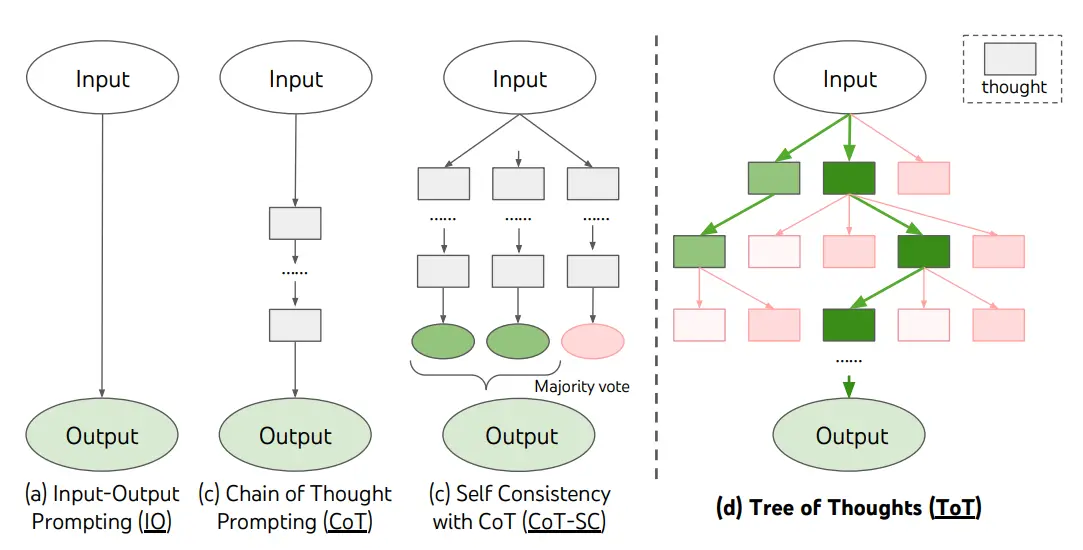

In [23]:

# Step 1: Generate multiple thoughts (branches)
prompt_generate_paths = """
A student is struggling to stay focused while studying.

Come up with 3 different strategies to help them stay focused. 
For each strategy, describe it clearly and explain why it might work.
Label them as Strategy A, B, and C.
"""

response_1 = model.generate(prompt=prompt_generate_paths)
thoughts = response_1['results'][0]['generated_text'].strip()
print("Generated Strategies (Tree Branches):")
print(thoughts)

# Step 2: Evaluate each path
prompt_evaluate_paths = f"""
Here are three strategies to help a student stay focused:

{thoughts}

Evaluate each strategy on effectiveness and ease of use, 
and recommend the best one. Justify your choice.
"""

response_2 = model.generate(prompt=prompt_evaluate_paths)
evaluation = response_2['results'][0]['generated_text'].strip()
print("\nEvaluation and Recommendation:")
# Displaying Markdown
display(Markdown(evaluation))

Generated Strategies (Tree Branches):
Strategies: 
Strategy A: Students can use a timer to keep track of time. This way, they know how much time they have left to finish their work. 
Why it might work: Students often get distracted and lose track of time. A timer will help them stay focused. 
Strategy B: Students can create a study guide. This will help them stay focused because they will know what to study. 
Why it might work: Students often get distracted and forget what they need to study. A study guide will help them stay focused. 
Strategy C: Students can create a study schedule. This will help them stay focused because they will know when to study. 
Why it might work: Students often get distracted and forget when they need to study. A study schedule will help them stay focused.

Evaluation and Recommendation:


Strategies B and C are the best because they are easy to use.

#### Use Cases for Tree of Thought

| Use Case | Description |
| - | - | 
|Brainstorming ideas	|Generate multiple creative outputs|
|Logical puzzles or math	|Try various solution paths|
|Decision-making scenarios|	Evaluate pros/cons of different actions|
|Content creation|	Generate multiple drafts or styles|

## Self check

If you're using the Granite family of models from IBM watsonx.ai, you can adapt the self-check prompt technique with the ibm-watsonx Python SDK or via REST calls using Watsonx's APIs.

Below is a code sample that demonstrates how to:

1. Ask a factual question.
2. Use the Granite model to answer it.
3. Chain a second prompt to self-evaluate that answer.

In [24]:
# Step 3: Ask the factual question
question = "Who was the 16th president of the United States?"
response_1 = model.generate(prompt=question)
answer = response_1['results'][0]['generated_text'].strip()

print("Model's Answer:")
print(answer)

# Step 4: Self-check prompt
self_check_prompt = f"""
Here is a question and the model's answer.

Question: {question}
Answer: {answer}

Please evaluate the response for:
- Accuracy
- Relevance
- Completeness

Also suggest any improvements that could make the answer better.
"""

response_2 = model.generate(prompt=self_check_prompt)
evaluation = response_2['results'][0]['generated_text'].strip()

print("\nSelf-Evaluation:")
display(Markdown(evaluation))

Model's Answer:
Abraham Lincoln

Self-Evaluation:


Accuracy: 4 Relevance: 4 Completeness: 4

In [25]:
# Sample article text
article = """
Renewable energy sources such as solar and wind are transforming the power grid across the United States. 
Government incentives and falling technology costs are accelerating this transition. Experts believe that a 
majority of energy needs could be met by renewables within the next decade.
"""

# --- Prompt 1: Summarize the article ---
prompt1 = f"Summarize the following article in 2-3 sentences:\n\n{article}"
response1 = model.generate(prompt=prompt1)
summary1 = response1['results'][0]['generated_text'].strip()
print("🔹 Step 1: Summary\n", summary)

# Step 4: Self-check prompt
self_check_prompt = f"""
Here is a question and the model's answer.

Question: {prompt1}
Answer: {summary1}

Please evaluate the response for each of the following characteristics:
- Accuracy
- Relevance
- Completeness

Also suggest any improvements that could make the answer better.
"""

response_2 = model.generate(prompt=self_check_prompt)
evaluation = response_2['results'][0]['generated_text'].strip()

print("\nSelf-Evaluation:")
display(Markdown(evaluation))

🔹 Step 1: Summary
 However, the grid is not ready to handle the large-scale integration of renewables.

Self-Evaluation:


Accuracy: 4 Relevance: 4 Completeness: 4

In [26]:
# --- Prompt 2: Extract key insights for LinkedIn audience ---
prompt2 = f"Based on this summary, list 2 key insights that would be relevant to a business audience on LinkedIn:\n\n{summary1}"
response2 = model.generate(prompt=prompt2)
insights2 = response2['results'][0]['generated_text'].strip()
print("\n🔹 Step 2: Key Insights\n", insights)

# Step 4: Self-check prompt
self_check_prompt = f"""
Here is a question and the model's answer.

Question: {prompt2}
Answer: {insights2}

Please evaluate the response for each of the following characteristics:
- Accuracy
- Relevance
- Completeness

Also suggest any improvements that could make the answer better.
"""

response_2 = model.generate(prompt=self_check_prompt)
evaluation = response_2['results'][0]['generated_text'].strip()

print("\n🔹 Self-Evaluation:")
display(Markdown(evaluation))


🔹 Step 2: Key Insights
 insights from the report include:

🔹 Self-Evaluation:


Accuracy

## ReAct

ReAct = Reasoning + Acting

It’s a technique where the model:

1. Reasons step-by-step (like Chain of Thought),
2. Performs an action (like calling a tool, API, or searching),
3. Alternates between reasoning and acting until it reaches a final answer.

This is especially useful for interactive agents, decision-making, and tool-using AI.

ReAct is a general paradigm that combines reasoning and acting with LLMs. ReAct prompts LLMs to generate verbal reasoning traces and actions for a task. This allows the system to perform dynamic reasoning to create, maintain, and adjust plans for acting while also enabling interaction to external environments (e.g., Wikipedia) to incorporate additional information into the reasoning.

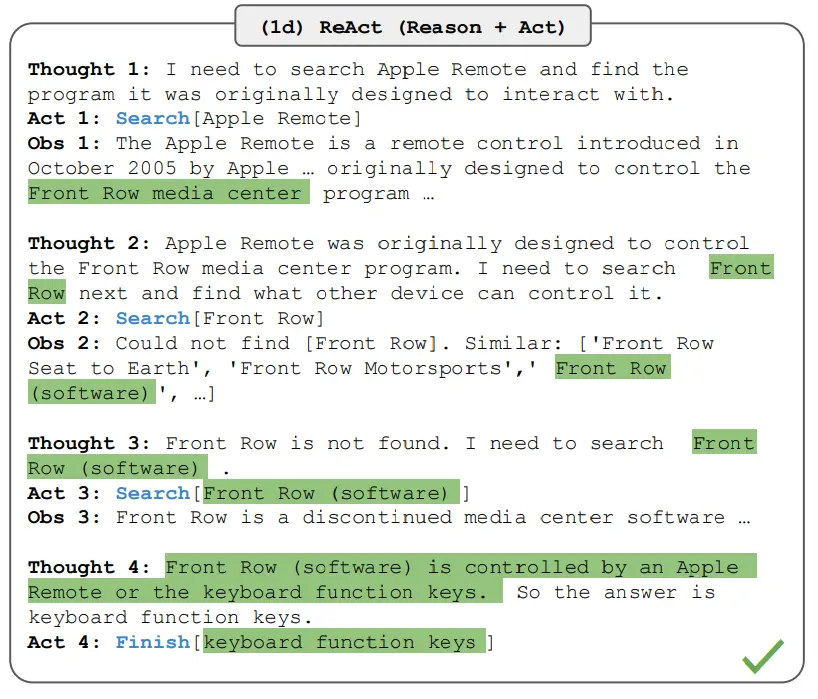

In [27]:
# ReAct Prompt
react_prompt = """
You are an intelligent agent that solves questions using a combination of reasoning and actions.

Use the format below:
Thought: What are you thinking?
Action: What action should be taken (e.g., lookup, calculate)?
Observation: What did the action result in?
... (repeat Thought/Action/Observation)
Final Answer: The final response.

Question: What is the capital of the country where the Eiffel Tower is located?

Begin:

Thought: The Eiffel Tower is a landmark in a specific country. I need to identify that country.
Action: lookup("Eiffel Tower location")
Observation: The Eiffel Tower is in France.

Thought: Now I need to find the capital of France.
Action: lookup("Capital of France")
Observation: The capital of France is Paris.

Final Answer:
"""

# Step 4: Run the prompt
response = model.generate(prompt=react_prompt)
result = response['results'][0]['generated_text'].strip()

print("🤖 ReAct Model Output:\n")
display(Markdown(result))

🤖 ReAct Model Output:



Paris.